In [3]:
import pandas as pd
import numpy as np
import prophet as prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df_sitting = pd.read_csv('resources/preprocessed_sitting_trans.csv', parse_dates=['DS'])
df_standing = pd.read_csv('resources/preprocessed_standing_trans.csv', parse_dates=['DS'])

In [5]:
print(df_sitting.shape, df_standing.shape)

(8640, 2) (8640, 2)


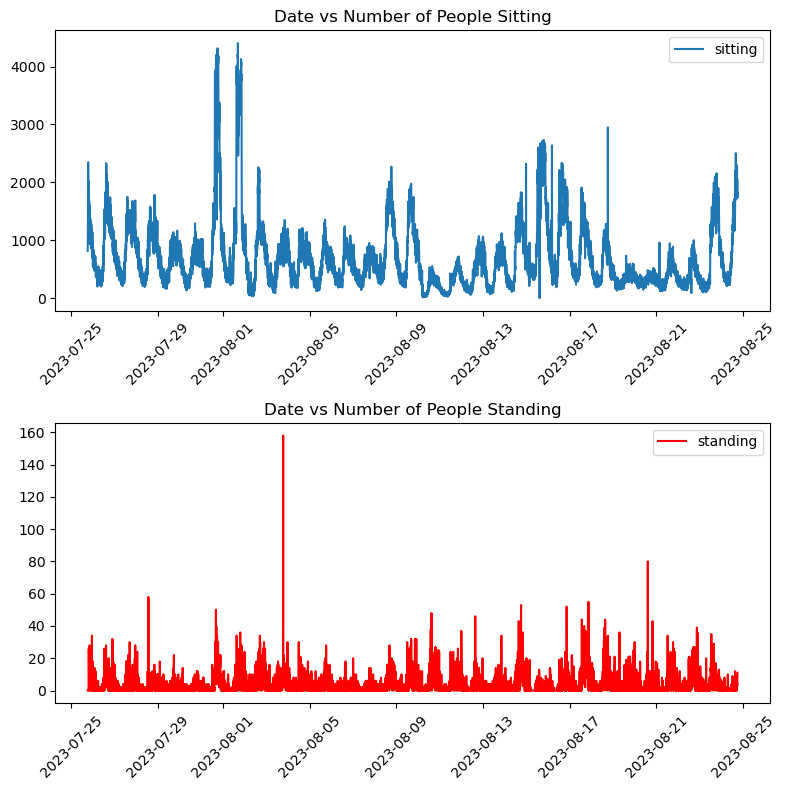

In [6]:
plt.figure(figsize=(8, 8))

# First subplot (top row)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(df_sitting['DS'], df_sitting['Y'], label='sitting')
plt.title('Date vs Number of People Sitting')
plt.xticks(rotation=45)
plt.legend()

# Second subplot (bottom row)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(df_standing['DS'], df_standing['Y'], color='r', label='standing')
plt.title('Date vs Number of People Standing')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout
plt.tight_layout()
#plt.title('Date vs Number of People')
# Show the plots
plt.show()

From the figure we are not sure if the sitting and standing transactions are related. We initially thought that 
standing transaction might act as a regressor (influencer) for sitting transactions.
Now let's apply prophet model.

In [47]:
# interval_width is an important parameter, the uncertainity level decreases with the decrease in the interval_width.
model = prophet.Prophet(growth='flat', seasonality_mode='additive', interval_width=0.6)

In [48]:
df_sitting.columns = ['ds','y']
model.fit(df_sitting)

18:47:53 - cmdstanpy - INFO - Chain [1] start processing
18:47:53 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
df_sitting.head()

,ds,y
0,2023-07-25 18:00:00,814.0
1,2023-07-25 18:05:00,954.0
2,2023-07-25 18:10:00,1054.0
3,2023-07-25 18:15:00,1274.0
4,2023-07-25 18:20:00,1766.0


In [50]:
df_sitting.tail()

,ds,y
8635,2023-08-24 17:35:00,1925.0
8636,2023-08-24 17:40:00,1747.0
8637,2023-08-24 17:45:00,1825.0
8638,2023-08-24 17:50:00,1734.0
8639,2023-08-24 17:55:00,2037.0


In [51]:
df_sitting_future = model.make_future_dataframe(periods=12, freq='5T', include_history=True)

In [52]:
df_sitting_future.tail(12)

,ds
8640,2023-08-24 18:00:00
8641,2023-08-24 18:05:00
8642,2023-08-24 18:10:00
8643,2023-08-24 18:15:00
8644,2023-08-24 18:20:00
8645,2023-08-24 18:25:00
8646,2023-08-24 18:30:00
8647,2023-08-24 18:35:00
8648,2023-08-24 18:40:00
8649,2023-08-24 18:45:00


In [53]:
forecast = model.predict(df_sitting_future)

In [54]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8647,2023-08-24 18:35:00,1165.339215,799.961530,1529.913139
8648,2023-08-24 18:40:00,1159.360157,767.265901,1528.966034
8649,2023-08-24 18:45:00,1153.132899,804.409540,1505.232324
8650,2023-08-24 18:50:00,1146.655538,792.682489,1514.911666
8651,2023-08-24 18:55:00,1139.926670,780.140902,1503.105659


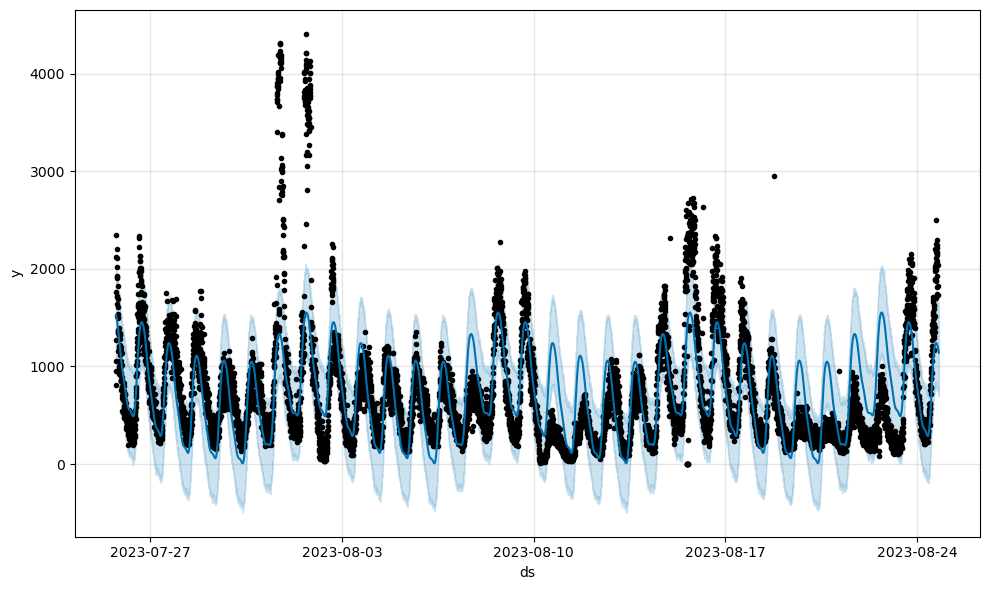

In [44]:
fig1 = model.plot(forecast)

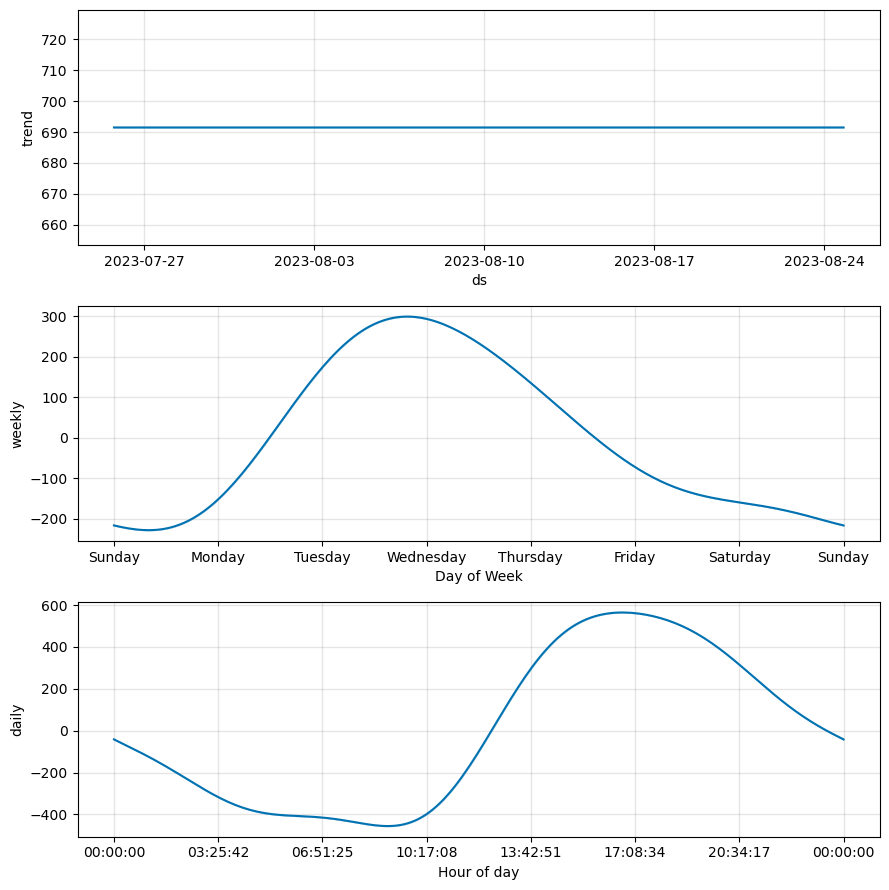

In [45]:
fig2 = model.plot_components(forecast)